# Chapter 5    Roots: Bracketing Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 5.1 Bisection

- 방정식의 근을 찾는 방법으로 연속인 함수에 적용된다. 
- 구간 내에 근이 있어야 하고 양끝에서 함수의 부호가 반대인 경우
- 반으로 나누어 중간에서의 함수값과 반대 부호를 가진 구간을 선택
- 간단하고 확실한 방법이지만 다른 방법에 비해 속도가 느림

- 구간 $a < x < b$ 에서 방정식 $f(x) = 0$ 를 구함. $f(a) f(b) < 0 $ 이어야 함. 이 경우 **bracket** 되어 있다고 함

**Iteration tasks**

- 중간 점을 구함, $c = (a + b)/2$
- 중간 점에서의 함수값을 구함, $f(c)$.
- 수렴조건을 만족하는지 테스트 (즉, $|c - a|$ 이 충분히 적거나 또는 $|f(c)|$ 이 충분히 적은 경우), 이 조건이 만족하면 $c$ 를 리턴하고 반복을 멈춤.
- $f(c)$ 의 부호를 검사하여 제로가 있는 곳을 새로운 구간을 선택, 즉 $(a, f(a))$ 또는 $(b, f(b))$ 를 $(c, f(c))$ 로 교체

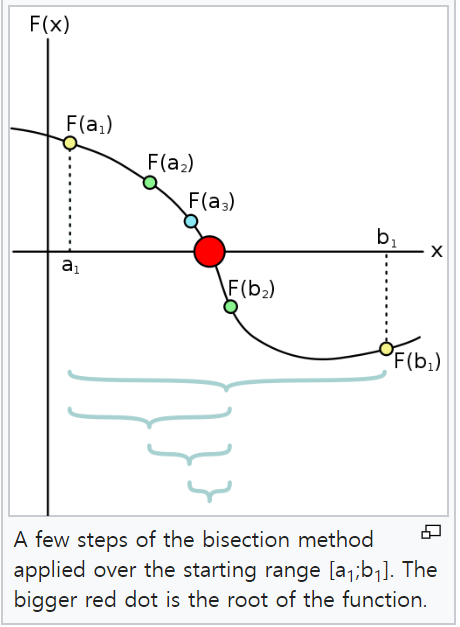

In [2]:
def bisection_naive(fun, a, b, tol=1e-6, kmax=100):
    fa, fb = fun(a), fun(b)    
    for k in range(kmax):
        c = 0.5*(a + b)
        print('{:5d}{:10.5f}{:10.5f}{:10.5f}'.format(k, a, c, b))
        fc = fun(c)
        if fb*fc < 0: 
            a, fa = c, fc            
        else:           
            b, fb = c, fc        
        if np.abs(b-a) < tol*np.abs(a+b): 
            print(k)
            return a

In [3]:
def bisection(fun, a, b, filter=False, tol=1e-6, maxiter=100):    
    fa, fb = fun(a), fun(b)
    if np.abs(fa) < tol: return a
    if np.abs(fb) < tol: return b
    if fa*fb > 0: 
        print("Not bracket")
        return None    
    for iter in range(maxiter):
        c = 0.5*(a + b)
        fc = fun(c)
        if np.abs(fc) < tol: return c
        if filter:
            if (np.abs(fc) > np.abs(fa)) and (np.abs(fc) > np.abs(fb)):
                return None
        if fb*fc < 0.0: 
            a, fa = c, fc
        else:           
            b, fb = c, fc        
        if np.abs(b-a) < tol*np.abs(a+b):
            return 0.5*(a + b)
    return None

$$ f(x) = e^{-x} - x = 0 $$

In [4]:
x1 = bisection_naive(lambda x: np.exp(-x) - x, 0, 1)
x2 = bisection(lambda x: np.exp(-x) - x, 0, 1)
x1, x2

    0   0.00000   0.50000   1.00000
    1   0.50000   0.75000   1.00000
    2   0.50000   0.62500   0.75000
    3   0.50000   0.56250   0.62500
    4   0.56250   0.59375   0.62500
    5   0.56250   0.57812   0.59375
    6   0.56250   0.57031   0.57812
    7   0.56250   0.56641   0.57031
    8   0.56641   0.56836   0.57031
    9   0.56641   0.56738   0.56836
   10   0.56641   0.56689   0.56738
   11   0.56689   0.56714   0.56738
   12   0.56714   0.56726   0.56738
   13   0.56714   0.56720   0.56726
   14   0.56714   0.56717   0.56720
   15   0.56714   0.56715   0.56717
   16   0.56714   0.56715   0.56715
   17   0.56714   0.56714   0.56715
   18   0.56714   0.56714   0.56715
   19   0.56714   0.56714   0.56714
19


(0.5671424865722656, 0.567143440246582)

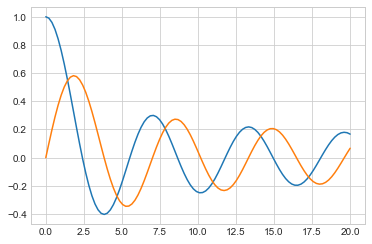

In [5]:
from scipy.special import j0, j1
x = np.linspace(0, 20, 100)
plt.plot(x, j0(x), x,j1(x));

In [6]:
def fzeros(fun, x1=0, h=1, m=10, tol=1e-6, kmax=100):
    f1 = fun(x1)
    n = 0
    sol = []
    while n < m:
        x2 = x1 + h
        f2 = fun(x2)
        if f1*f2 <= 0:
            n = n + 1
            x = bisection(fun, x1, x2, tol=tol, maxiter=kmax)
            sol.append(x)

        x1, f1 = x2, f2
    return np.array(sol)

fun = lambda x: j0(x)
sol = fzeros(fun, m=6)
print(sol)


# x = np.linspace(0, 20, 100)
# plt.plot(x, j0(x))
# plt.plot(sol, np.zeros_like(sol), 'o');

# np.diff(sol)


[ 2.40482712  5.52008057  8.65372467 11.79153442 14.93091583 18.07106018]


**Example 5.2**

Find roots of $ f(x) = \sin(10x) + \cos(3x) $ in tne interval (3, 6)

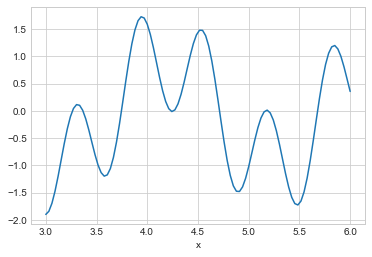

In [7]:
def fun(x):
    return np.sin(10*x) + np.cos(3*x)
x = np.linspace(3, 6, 100)
plt.plot(x, fun(x))
plt.xlabel('x');

[3.26242432 3.36599365 3.74574463 4.22906738 4.26359131 4.71239014
 5.16118652 5.19570801 5.67902832 6.05878418]


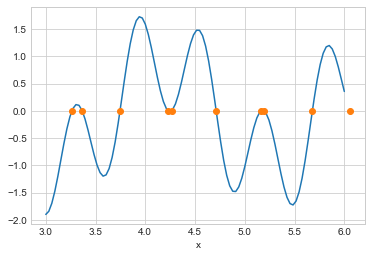

In [8]:
x = np.linspace(3, 6, 100)
plt.plot(x, fun(x))
plt.xlabel('x')

sol = fzeros(fun, x1=3, h=0.01, m=10)
print(sol)
plt.plot(sol, np.zeros_like(sol), 'o');

9
[3.262 3.366 3.746 4.229 4.264 4.712 5.161 5.196 5.679]


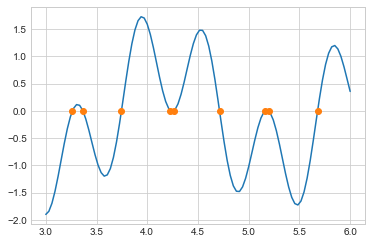

In [9]:
x1 = 3
f1 = fun(x1)
h = 0.01
xsol = []
n = 0
while x1< 6:
    x2 = x1 + h
    f2 = fun(x2)
    if f1*f2 <= 0:
        n = n + 1 
        x = bisection(fun, x1, x2)
        xsol = np.r_[xsol, x]
    x1, f1 = x2, f2

print(n)
print(np.round(xsol,3))

x = np.linspace(3, 6, 100)
plt.plot(x, fun(x))
plt.plot(xsol, fun(xsol), 'o');

### Bessel function
다음은 전도열전달 해석에 나오는 고유값을 구하는 문제이다. 함수값이 제로가 되는 x를 10개 구하고자 한다. 

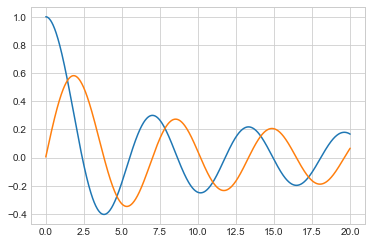

In [10]:
# eigenvalue of 2-dimensional conduction problem 
from scipy.special import j0, j1
x = np.linspace(0.01, 20, 1000)
plt.plot(x, j0(x), x, j1(x)) 


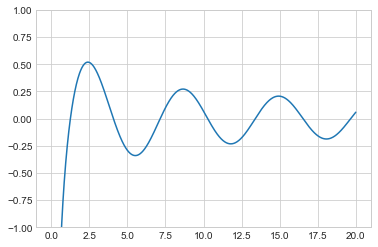

In [11]:
def fun(x, Bi): 
    return j1(x) - Bi*j0(x)/x
Bi = 1
x = np.linspace(0.01, 20, 1000)
plt.plot(x, fun(x, Bi))
plt.grid('on')
plt.ylim([-1, 1]);

위 그림을 보면 근은 1 이상의 간격을 가지고 있음을 알 수 있고 x=0 에서 무한대의 값을 가진다. 따라서 증분값을 1로 하고 근의 존재 유무를 확인하고 만일 근이 존재하면 bisection 방법으로 근을 구한다. 

In [12]:
def fzeros(fun, x1=0, h = 0.1, n=10):
    sol = []
    f1 = fun(x1)
    while len(sol) < n:
        x2 = x1 + h
        f2 = fun(x2)
        if f1*f2 < 0:
            x = bisection(fun, x1, x2)
            sol = np.r_[sol, x]
            if len(sol) > 1:
                h = (sol[-1] - sol[-2])/2
        x1, f1 = x2, f2
    return sol

In [13]:
Bi = 1
x = fzeros(lambda x: fun(x, Bi), x1=0.1, n=15)
print(x)
print(np.diff(x))

[ 1.25578308  4.07947998  7.15580223 10.27098536 13.3983934  16.53115494
 19.66672602 22.80394761 25.94221981 29.08121907 32.22072589 35.36057912
 38.50074038 41.64110361 44.78165864]
[2.8236969  3.07632225 3.11518312 3.12740804 3.13276154 3.13557108
 3.13722159 3.13827221 3.13899925 3.13950682 3.13985323 3.14016126
 3.14036324 3.14055502]


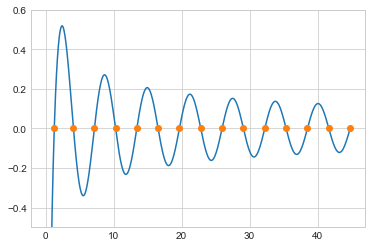

In [14]:
xx = np.linspace(0.01, x[-1], 1000)
plt.plot(xx, fun(xx, Bi))
plt.plot(x, fun(x, Bi), 'o')
plt.grid('on')
plt.ylim([-0.5, 0.6]);

### False position method (regula falsi method)
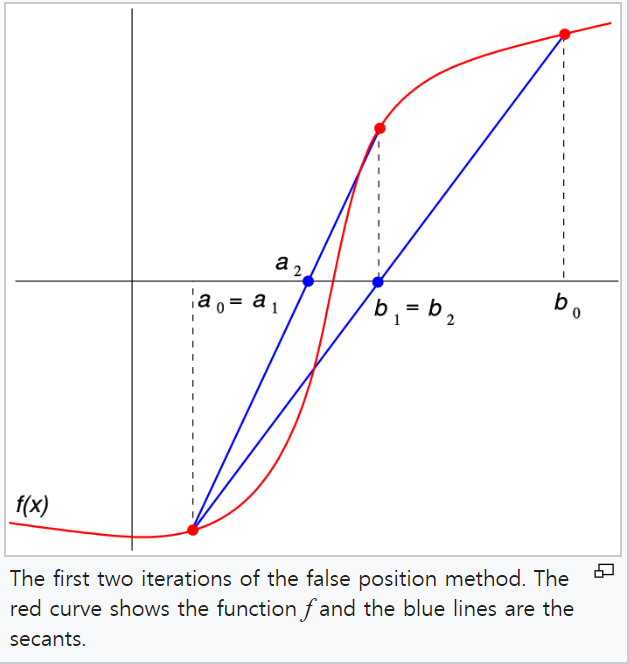


$$ y-f(b_{k})={\frac {f(b_{k})-f(a_{k})}{b_{k}-a_{k}}}(x-b_{k}).$$

Now choose $c_k$ to be the $x$-intercept of this line, that is, the value of $x$ for which $y = 0$, and substitute these values to obtain

$${\displaystyle f(b_{k})+{\frac {f(b_{k})-f(a_{k})}{b_{k}-a_{k}}}(c_{k}-b_{k})=0.}$$

Solving this equation for $c_k$ gives:

$${\displaystyle c_{k}=b_{k}-f(b_{k}){\frac {b_{k}-a_{k}}{f(b_{k})-f(a_{k})}}={\frac {a_{k}f(b_{k})-b_{k}f(a_{k})}{f(b_{k})-f(a_{k})}}.}$$

In [15]:
def false_position(fun, a, b, tol=1e-6, kmax=100):
    fa, fb = fun(a), fun(b)
    side = 0
    for k in range(kmax):
        c = (a*fb - b*fa)/(fb - fa)
        fc = fun(c)

#         print('{:5d}{:15.5g}{:15.5g}{:15.5g}'.format(k, a, c, b))
        print('{:5d}{:15.5f}{:15.5f}{:15.5f}'.format(k, fa, fc, fb))


        if np.abs(a - b) < tol*np.abs(a + b):
            return c

        if fb*fc > 0:
            b, fb = c, fc
            fa = fa/2 if side == -1 else fa
            side = -1
        else:
            a, fa = c, fc
            fb = fb/2 if side == 1 else fb
            side = 1
    return None

In [20]:
def false_position1(fun, a, b, tol=1.0e-6, kmax=100):
    fa, fb = fun(a), fun(b)
    k = 0
    for k in range(kmax):
        k += 1
        
        c = (a*fb - b*fa)/(fb - fa)
        
        print('{:10d}{:10.5f}{:10.5f}{:10.5f}'.format(k, a, c, b))
        
        if np.abs(a-b) < tol*np.abs(a+b):
            return c
        
        fc = fun(c)        
        if fb*fc > 0: 
            b, fb = c, fc
        else:
            a, fa = c, fc    
    return None
    

In [30]:
x = false_position1(lambda x: x**10 - 1, 0, 2, kmax = 200)
# x = bisection_naive(lambda x: x**10 - 1, 0, 2)  # ????????????????????????????????
print(x)

         1   0.00000   0.00195   2.00000
         2   0.00195   0.00390   2.00000
         3   0.00390   0.00585   2.00000
         4   0.00585   0.00780   2.00000
         5   0.00780   0.00975   2.00000
         6   0.00975   0.01169   2.00000
         7   0.01169   0.01363   2.00000
         8   0.01363   0.01557   2.00000
         9   0.01557   0.01751   2.00000
        10   0.01751   0.01945   2.00000
        11   0.01945   0.02138   2.00000
        12   0.02138   0.02331   2.00000
        13   0.02331   0.02524   2.00000
        14   0.02524   0.02717   2.00000
        15   0.02717   0.02910   2.00000
        16   0.02910   0.03102   2.00000
        17   0.03102   0.03294   2.00000
        18   0.03294   0.03487   2.00000
        19   0.03487   0.03679   2.00000
        20   0.03679   0.03870   2.00000
        21   0.03870   0.04062   2.00000
        22   0.04062   0.04253   2.00000
        23   0.04253   0.04444   2.00000
        24   0.04444   0.04635   2.00000
        25   0.0

### Case study 5.6 온실가스와 빗물

In [ ]:
def func(pH, pCO2):
    K1 = 10**(-6.3)
    K2 = 10**(-10.3)
    Kw = 10**(-14)
    KH = 10**(-1.46)
    H = 10**(-pH)
    f = K1/(1e6*H)*KH*pCO2 + 2*K2*K1/(1e6*H)*KH*pCO2 + Kw/H - H
    return f

pH_1 = bisection(lambda pH: func(pH, 315), 2, 12, tol=1e-8)
pH_2 = bisection(lambda pH: func(pH, 386), 2, 12, tol=1e-8)
print(np.round([pH_1, pH_2], 2))